In [26]:
import fdcomp
import rasterio
import numpy as np
import pandas as pd
import matplotlib

In [2]:
wd = '/Volumes/Cloud/Yandex/RSCF_Flow_directions/TESTS_raster_generalization'

acc1_src = rasterio.open(f'{wd}/HydroSHEDS/hyd_glo_acc_30s_sa.tif')
acc1 = acc1_src.read(1)
 
dir1_src = rasterio.open(f'{wd}/HydroSHEDS/hyd_glo_dir_30s_sa.tif')
dir1 = dir1_src.read(1)
aff1 = np.array(dir1_src.get_transform())[[1, 2, 0, 4, 5, 3]]

aff1

array([ 8.33333333e-03,  0.00000000e+00, -8.40000000e+01,  0.00000000e+00,
       -8.33333333e-03,  1.40000000e+01])

In [3]:
tree, seeds = fdcomp.d8tree(acc1, dir1, aff1)

In [20]:
# dir2_src = rasterio.open(f'{wd}/COTAT/COTAT_2_flowdir_sa.tif')
methods = ['COTAT', 'DMM']
ress = ['05', '1', '2']
nums = [1, 10, 100, 1000, 10000, 100000, 1000000]

method = []
res = []
num = []
accur = []

for m in methods:
    for r in ress:
        dir2_src = rasterio.open(f'{wd}/{m}/{m}_{r}_flowdir_sa.tif')
        dir2 = dir2_src.read(1)
        for n in nums:
            accuracy = fdcomp.d8comp(dir1, dir2, seeds[0:n])
            flt = accuracy > 0
            method.append(m)
            res.append(r)
            num.append(n)
            accur.append(np.average(accuracy[flt], weights = seeds[0:n,5][flt]))

df = pd.DataFrame({'method' : method, 'res': res, 'num': num, 'accur': accur})


method  res
COTAT   05     Axes(0.125,0.11;0.775x0.77)
        1      Axes(0.125,0.11;0.775x0.77)
        2      Axes(0.125,0.11;0.775x0.77)
DMM     05     Axes(0.125,0.11;0.775x0.77)
        1      Axes(0.125,0.11;0.775x0.77)
        2      Axes(0.125,0.11;0.775x0.77)
dtype: object

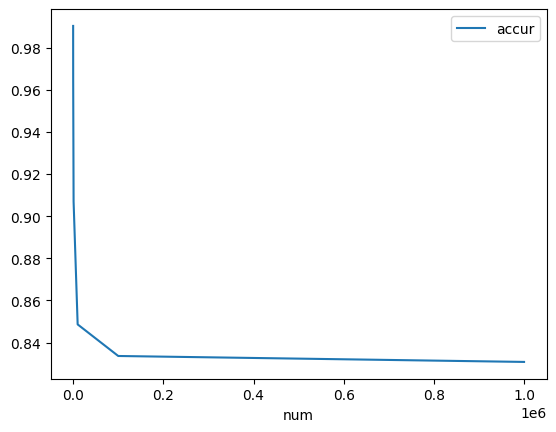

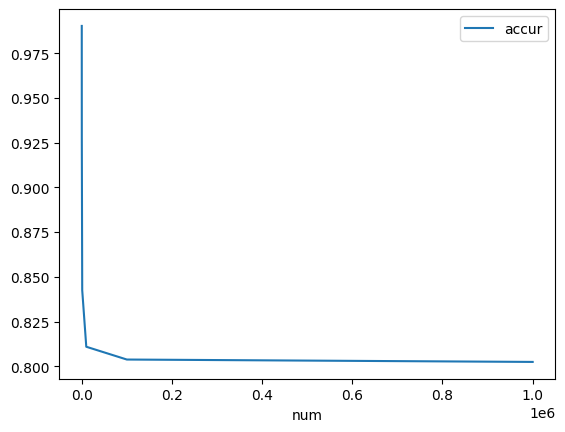

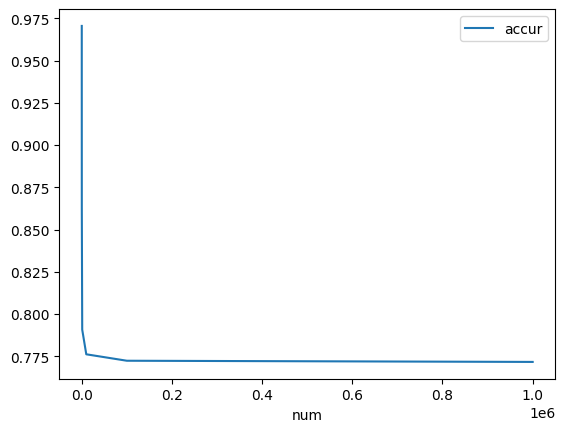

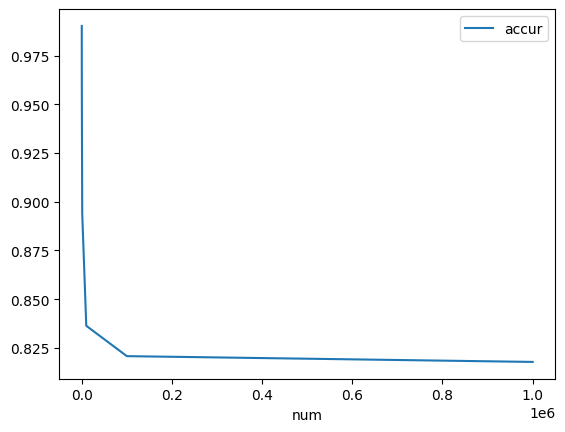

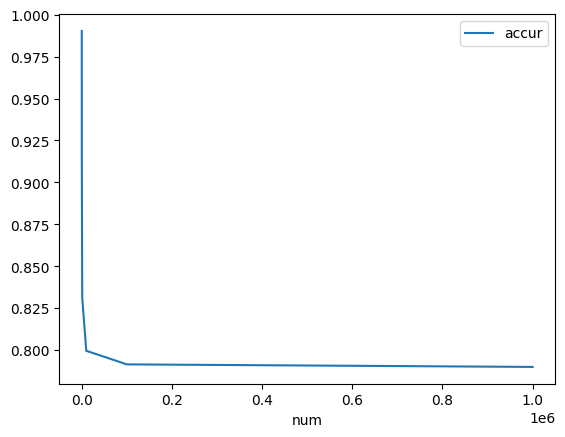

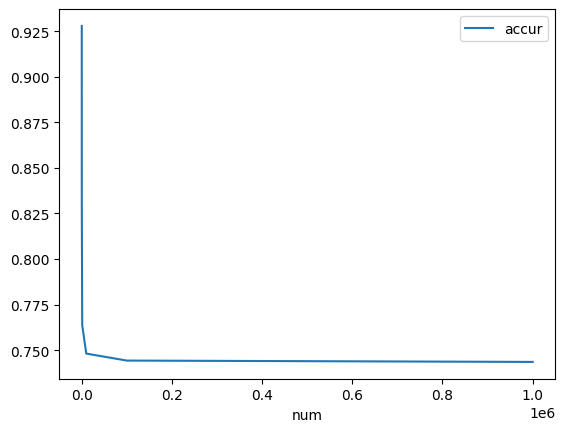

In [29]:
df.to_excel(f'{wd}stats.xlsx')

In [105]:
profile = acc1_src.profile

dst = rasterio.open(f'{wd}/d8tree.tif', 'w', **profile)
dst.write(tree, 1)
dst.close()